In [ ]:
import pandas as pd

# Create an empty DataFrame
bonds_data = pd.DataFrame()

# Input data for each column
bonds_name = ['CA135087J546', 'CA135087J967', 'CA135087K528', 'CA135087K940', 'CA135087L518', 'CA135087L930', 'CA135087M847', 'CA135087N837', 'CA135087P576', 'CA135087Q491']
bonds_data['Bond'] = bonds_name  # Assuming 10 bonds

# Manually define maturity dates for each bond
maturity_dates = ['2024-3-1', '2024-9-1', '2025-3-1', '2025-9-1', '2026-3-1', '2026-9-1', '2027-3-1', '2027-9-1', '2028-3-1', '2028-9-1']
bonds_data['Maturity_Date'] = maturity_dates

# Manually define coupon rates for each bond
coupon_rates = [2.25, 1.5, 1.25, 0.5, 0.25, 1, 1.25, 2.75, 3.5, 3.25]
bonds_data['Coupon_Rate'] = coupon_rates

# Manually define close prices for each day for each bond
close_prices = {
    '2024-1-8': [99.63, 97.96, 96.46, 94.34, 92.862, 93.46, 93.282, 97.58, 100.5, 99.74],
    '2024-1-9': [99.64, 97.98, 96.482, 94.37, 92.86, 93.44, 93.301, 97.591, 100.48, 99.72],
    '2024-1-10': [99.65, 97.985, 96.552, 94.38, 92.844, 93.55, 93.245, 97.603, 100.439, 99.72],
    '2024-1-11': [99.661, 97.982, 96.576, 94.43, 92.856, 93.53, 93.186, 97.52, 100.328, 99.55],
    '2024-1-12': [99.67, 98.021, 96.661, 94.49, 93.023, 93.6, 93.467, 97.74, 100.637, 99.88],
    '2024-1-15': [99.687, 98.054, 96.715, 94.49, 93.008, 93.57, 93.493, 97.772, 100.673, 99.91],
    '2024-1-16': [99.68, 97.794, 96.54, 94.42, 92.796, 93.4, 93.141, 97.441, 100.22, 99.44],
    '2024-1-17': [99.683, 97.975, 96.448, 94.25, 92.57, 93.12, 92.856, 97.092, 99.834, 98.99],
    '2024-1-18': [99.708, 97.999, 96.495, 94.24, 92.546, 93.08, 92.753, 96.956, 99.662, 98.81],
    '2024-1-19': [99.72, 98.007, 96.46, 94.22, 92.545, 93.07, 92.764, 96.947, 99.623, 98.77]
}

for day, prices in close_prices.items():
    bonds_data[day + '_Close_Price'] = prices

# Display the DataFrame
print("Bonds Data:")
print(bonds_data)


Bonds Data:
           Bond Maturity_Date  Coupon_Rate  2024-1-8_Close_Price  \
0  CA135087J546      2024-3-1         2.25                99.630   
1  CA135087J967      2024-9-1         1.50                97.960   
2  CA135087K528      2025-3-1         1.25                96.460   
3  CA135087K940      2025-9-1         0.50                94.340   
4  CA135087L518      2026-3-1         0.25                92.862   
5  CA135087L930      2026-9-1         1.00                93.460   
6  CA135087M847      2027-3-1         1.25                93.282   
7  CA135087N837      2027-9-1         2.75                97.580   
8  CA135087P576      2028-3-1         3.50               100.500   
9  CA135087Q491      2028-9-1         3.25                99.740   

   2024-1-9_Close_Price  2024-1-10_Close_Price  2024-1-11_Close_Price  \
0                99.640                 99.650                 99.661   
1                97.980                 97.985                 97.982   
2                96.

In [ ]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from scipy.optimize import fsolve

# Assuming you already have the 'bonds_data' DataFrame with the updated structure

# Convert 'Maturity_Date' to datetime
bonds_data['Maturity_Date'] = pd.to_datetime(bonds_data['Maturity_Date'])

# Function to calculate YTM with semi-annual payments
def calculate_ytm(price, par, T, C, freq=2):
    periods = T * freq
    coupon_payment = C * par / freq
    cash_flows = [-price] + [coupon_payment] * int(periods - 1) + [coupon_payment + par]

    ytm = npf.irr(cash_flows) * freq
    return ytm

# Create a new DataFrame for YTM values
ytm_data = pd.DataFrame()

# Copy 'Bond' and 'Maturity_Date' columns from the original DataFrame
ytm_data[['Bond', 'Maturity_Date']] = bonds_data[['Bond', 'Maturity_Date']]

# Iterate through each date column and add YTM values to the new DataFrame
for date_column in bonds_data.columns[3:]:
    # Extract the date and close prices for the current date
    date = pd.to_datetime(date_column.replace('_Close_Price', ''))
    prices = bonds_data[date_column]

    # Calculate YTM for each bond on the current date
    ytm_column = date_column.replace('_Close_Price', '_YTM')
    ytm_data[ytm_column] = [calculate_ytm(prices[i], 100, (row['Maturity_Date'] - date).days / 365.25, row['Coupon_Rate'] / 100) for i, row in bonds_data.iterrows()]
# Display the DataFrame with YTM for each date
print("YTM Data:")
print(ytm_data)






YTM Data:
           Bond Maturity_Date  2024-1-8_YTM  2024-1-9_YTM  2024-1-10_YTM  \
0  CA135087J546    2024-03-01      0.030011      0.029807       0.029604   
1  CA135087J967    2024-09-01      0.056962      0.056542       0.056437   
2  CA135087K528    2025-03-01      0.049212      0.048977       0.048232   
3  CA135087K940    2025-09-01      0.044422      0.044205       0.044132   
4  CA135087L518    2026-03-01      0.039992      0.040003       0.040091   
5  CA135087L930    2026-09-01      0.037656      0.037744       0.037260   
6  CA135087M847    2027-03-01      0.036339      0.036269       0.036476   
7  CA135087N837    2027-09-01      0.034905      0.034871       0.034834   
8  CA135087P576    2028-03-01      0.033654      0.033707       0.033817   
9  CA135087Q491    2028-09-01      0.033127      0.033175       0.033175   

   2024-1-11_YTM  2024-1-12_YTM  2024-1-15_YTM  2024-1-16_YTM  2024-1-17_YTM  \
0       0.029380       0.029196       0.028850       0.028993       0.028

In [ ]:
pip install numpy-financial


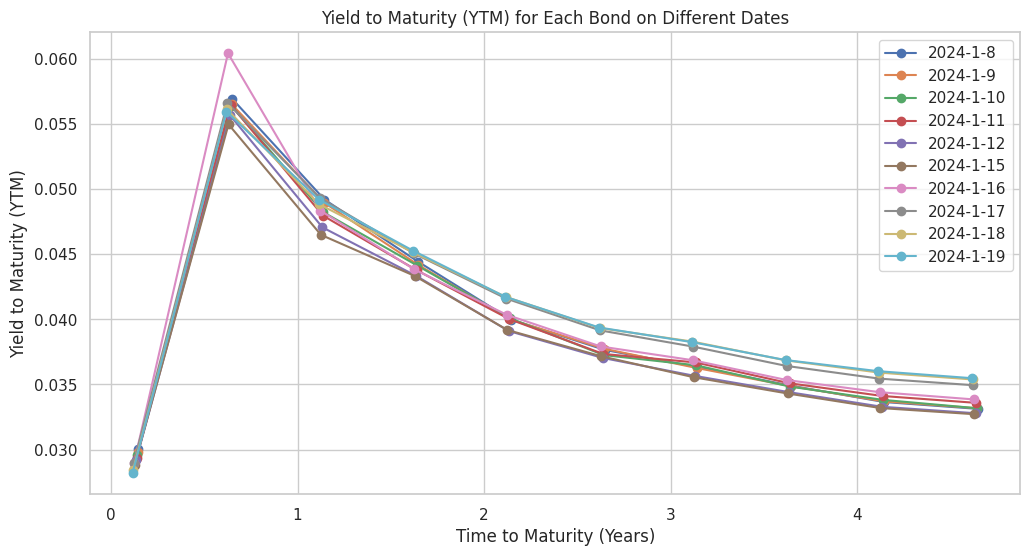

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(12, 6))

# Iterate through each day and plot YTM values
for day in ytm_data.columns[2:]:
    date_str = day.replace('_YTM', '')
    date_format = "%Y-%m-%d"  # Adjust the format based on your data
    date = pd.to_datetime(date_str, format=date_format)
    time_to_maturity = (ytm_data['Maturity_Date'] - date).dt.days / 365.25
    plt.plot(time_to_maturity, ytm_data[day], label=date_str.replace('_Close_Price', ''), marker='o')  # Use marker='o' for dots

# Set labels and title
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Yield to Maturity (YTM)')
plt.title('Yield to Maturity (YTM) for Each Bond on Different Dates')

# Add legend
plt.legend()

# Show the plot
plt.show()


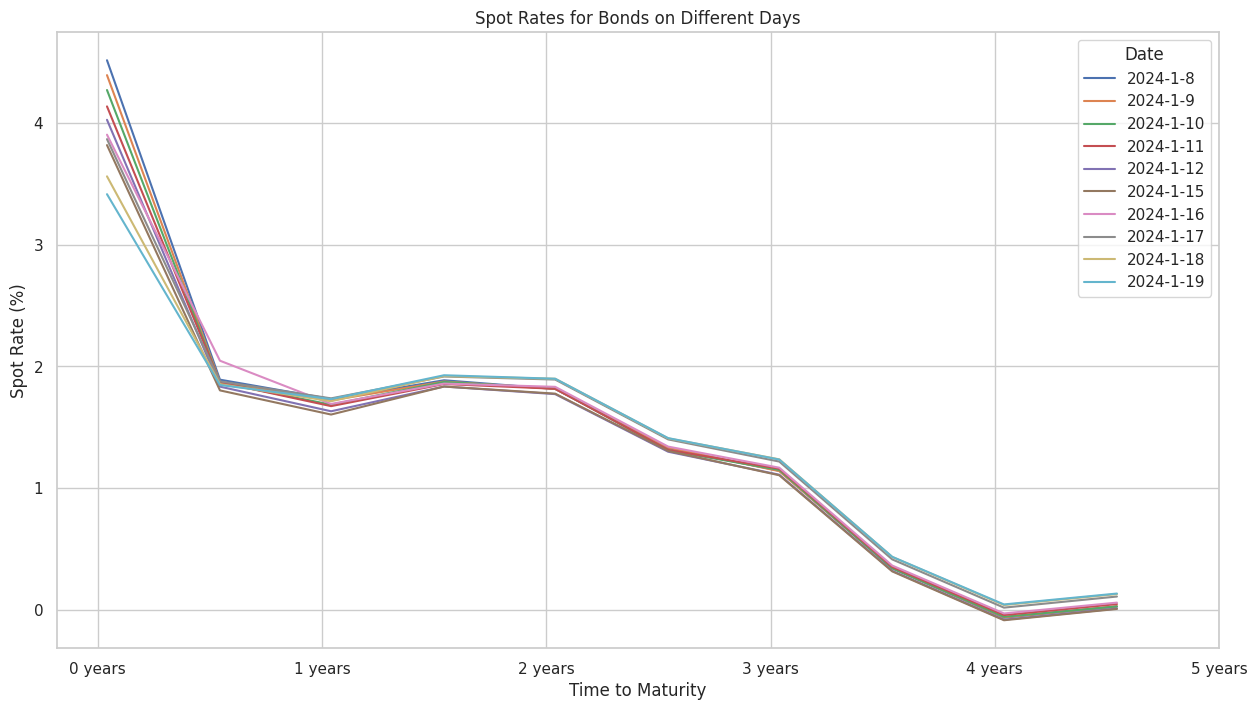

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Define spot rate functions
def spot_rate_no_coupon(price, notional, T):
    spot = -math.log(price / notional) / T
    return spot * 10

def spot_rate_with_coupon(price, notional, spot_data, t1, t2, coupon):
    p1 = coupon * notional
    p2 = (1 + coupon) * notional
    spot = -math.log((price - p1 * math.exp(-spot_data * t1)) / p2) / t2
    return spot

def get_dirty_price(n, coupon, notional, clean_price):
    accrued_interest = n / 365 * coupon * notional
    dirty_price = accrued_interest + clean_price
    return dirty_price

# Create a DataFrame to store spot rates
spot_rates_data = pd.DataFrame()

# Calculate time to maturity for each bond and normalize it to the range [0, 5]
bonds_data['Time_to_Maturity'] = ((pd.to_datetime(bonds_data['Maturity_Date']) - pd.to_datetime('today')).dt.days / 365.25) / 5.0

# Calculate spot rates for each bond and each day
for day in close_prices.keys():
    spot_rates_data[day + '_Spot_Rate'] = bonds_data.apply(lambda row: spot_rate_no_coupon(row[day + '_Close_Price'], 100, row['Time_to_Maturity']), axis=1)


# Scatter plot without skipping any bonds

plt.figure(figsize=(15, 8))

for day in close_prices.keys():
    plt.plot(bonds_data['Time_to_Maturity'], spot_rates_data[day + '_Spot_Rate'], label=day)

# Set x-axis ticks and labels
plt.xticks([i/5 for i in range(6)], [f'{i} years' for i in range(6)])

plt.title('Spot Rates for Bonds on Different Days')
plt.xlabel('Time to Maturity')
plt.ylabel('Spot Rate (%)')
plt.legend(title='Date')
plt.show()





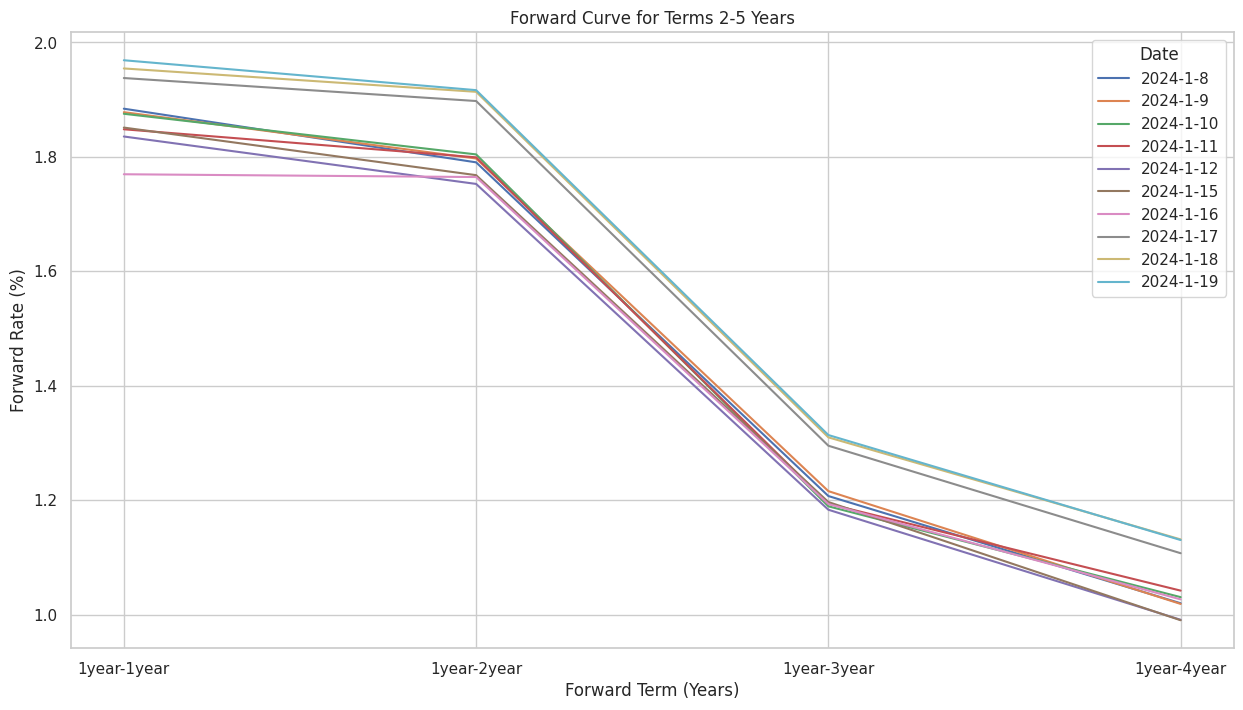

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assume you already have the bonds_data and close_prices

# Create a DataFrame to store forward rates
forward_curve_data = pd.DataFrame()

# Calculate forward rates for terms ranging from 2 to 5 years for each day
for day in close_prices.keys():
    spot_rates_for_day = spot_rates_data[day + '_Spot_Rate']

    # Calculate forward rates for terms ranging from 2 to 5 years
    for term in range(2, 6):
        numerator = (1 + spot_rates_for_day[term + 1]) ** (2*(term + 1))
        denominator = (1 + spot_rates_for_day[1]) ** 2
        forward_rate = ((numerator / denominator) ** (1 / (2 * term))) - 1
        forward_curve_data.loc[day, f'1yr-{term}yr_Forward_Rate'] = forward_rate

# Plotting the forward curves for each day
plt.figure(figsize=(15, 8))

for day in close_prices.keys():
    plt.plot(range(2, 6), forward_curve_data.loc[day, '1yr-2yr_Forward_Rate':'1yr-5yr_Forward_Rate'], label=day)
plt.xticks(range(2, 6), ['1year-1year', '1year-2year', '1year-3year', '1year-4year'])
plt.title('Forward Curve for Terms 2-5 Years')
plt.xlabel('Forward Term (Years)')
plt.ylabel('Forward Rate (%)')
plt.legend(title='Date')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have the 'bonds_data' DataFrame with the updated structure
# Also assuming that 'forward_curve_data' DataFrame is available

# Create DataFrames to store log-returns
log_returns_yield = pd.DataFrame()
log_returns_forward = pd.DataFrame()

# Calculate log-returns for yields
log_returns_yield = bonds_data.iloc[:-1, 3:].apply(lambda row: np.log1p((row.shift(-1) - row) / row), axis=1)

# Calculate log-returns for forward rates
log_returns_forward = forward_curve_data.apply(lambda row: np.log1p((row.shift(-1) - row) / row), axis=1)

# Check the dimensions of the DataFrames
print("Dimensions of log_returns_yield:", log_returns_yield.shape)
print("Dimensions of log_returns_forward:", log_returns_forward.shape)

# Calculate covariance matrices
covariance_matrix_yield = log_returns_yield.cov()
covariance_matrix_forward = log_returns_forward.cov()

# Display the covariance matrices
print("\nCovariance Matrix for Yields:")
print(covariance_matrix_yield)

print("\nCovariance Matrix for Forward Rates:")
print(covariance_matrix_forward)


Dimensions of log_returns_yield: (9, 11)
Dimensions of log_returns_forward: (10, 4)

Covariance Matrix for Yields:
                       2024-1-8_Close_Price  2024-1-9_Close_Price  \
2024-1-8_Close_Price           3.566522e-08         -1.816402e-08   
2024-1-9_Close_Price          -1.816402e-08          2.964033e-07   
2024-1-10_Close_Price          5.198990e-08          1.151225e-07   
2024-1-11_Close_Price         -6.242335e-08         -3.821732e-07   
2024-1-12_Close_Price          2.272079e-08         -4.650207e-08   
2024-1-15_Close_Price          8.757278e-08          3.729226e-07   
2024-1-16_Close_Price          1.742422e-07          1.419566e-07   
2024-1-17_Close_Price          6.732536e-08          2.015041e-07   
2024-1-18_Close_Price          7.883579e-09         -2.648957e-08   
2024-1-19_Close_Price         -7.373588e-05         -7.790211e-05   
Time_to_Maturity                        NaN                   NaN   

                       2024-1-10_Close_Price  2024-1-11_

In [ ]:
# Exclude 'Time_to_Maturity' column when calculating covariance matrices
covariance_matrix_yield = log_returns_yield.drop(columns=['Time_to_Maturity']).cov()
covariance_matrix_forward = log_returns_forward.cov()

# Check for NaN or infinite values in the updated covariance matrices
if np.any(~np.isfinite(covariance_matrix_yield)):
    print("Covariance Matrix for Yields contains NaN or infinite values.")
else:
    # Calculate eigenvalues and eigenvectors for the updated covariance matrix of yields
    eigenvalues_yield, eigenvectors_yield = np.linalg.eig(covariance_matrix_yield)
    # Display the eigenvalues and eigenvectors
    print("\nEigenvalues for Yields:")
    print(eigenvalues_yield)
    print("\nEigenvectors for Yields:")
    print(eigenvectors_yield)

if np.any(~np.isfinite(covariance_matrix_forward)):
    print("Covariance Matrix for Forward Rates contains NaN or infinite values.")
else:
    # Calculate eigenvalues and eigenvectors for covariance matrix of forward rates
    eigenvalues_forward, eigenvectors_forward = np.linalg.eig(covariance_matrix_forward)
    # Display the eigenvalues and eigenvectors
    print("\nEigenvalues for Forward Rates:")
    print(eigenvalues_forward)
    print("\nEigenvectors for Forward Rates:")
    print(eigenvectors_forward)




Eigenvalues for Yields:
[2.09674127e+00 2.37085998e-06 1.45038986e-06 2.45744537e-07
 9.31390733e-08 5.39131298e-08 2.32767366e-08 3.04370741e-10
 1.08023110e-20 6.58639399e-20]

Eigenvectors for Yields:
[[ 3.51670019e-05  4.54543132e-02  3.47903036e-02  2.11627909e-01
   1.04602338e-01  3.94616652e-01 -5.07547283e-01 -6.92126448e-02
   5.57217593e-01 -6.97460518e-01]
 [ 3.71541993e-05  2.04242055e-01 -2.00955014e-01 -7.10144726e-01
   3.22124880e-01 -1.06758963e-01 -2.78030735e-01 -3.10239552e-01
  -2.31723658e-01 -8.50341975e-02]
 [ 1.83009136e-04  2.64166854e-01 -1.23350251e-01  3.88008128e-01
   1.74691018e-01 -1.47873393e-01  2.09706372e-01  2.75339582e-01
  -4.05203530e-01 -3.02274182e-01]
 [-5.53915241e-04 -4.79710468e-01  1.72452091e-01  3.96056047e-01
   3.42274008e-01 -2.13183846e-01 -1.69805847e-01 -5.72440624e-01
  -2.53106209e-01  1.53460349e-01]
 [ 1.90059899e-05 -4.33679670e-02  1.40591723e-01 -8.09048061e-03
   5.12245100e-01  6.09194296e-01 -1.16446042e-01  3.50398636